#### Tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses, activations # tf.keras 에 필요한 함수들이 모여있습니다.
#optimizers , metrics , activations 등

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [4]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


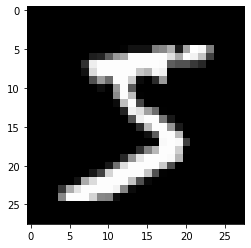

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

#### Normalization

In [7]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [8]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [9]:
train_data.shape

(60000, 784)

#### One-hot encoding

In [10]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다.

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [12]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<br> 

#### 2. Build the model & Set the criterion 

tf.keras

- sequential : 레이어가 순차적, =쉬움, 에러가 적음
- functional : 모델이 복잡할때 (e.g 레이어가 중간에 두개로 갈라진다거나..)


In [13]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)
#모델을 만들기 위해 만드는 바탕

In [14]:
model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) # Dense-layer (relu & he)
#Dense 는 x(input)개수만 적어주면 됨
#kernel initializer default: Xavier 
model.add(layers.Dropout(0.2)) # Dropout-layer = 죽일 값 
model.add(layers.Dense(units=10, activation='softmax')) # (Output) Dense-layer with softmax function, 0~9 -> 10
#units = output 레이어의 퍼셉트론 개수 = 클래스 개수 

In [15]:
# "Compile" the model description (Configures the model for training)
#컴퓨터에서 실행가능한 코드로 만들어주기 - 돌리면 내부적으로 C코드로 바꿔줌
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=['accuracy']) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
# # Regression
# model.add(layers.Dense(units=1, activation=None))
# model.compile(optimizer='adam',
#               loss=losses.mean_squared_error, #losses from keras 
#               metrics=['mean_squared_error']) 

# # Multi-class classification
# model.add(layers.Dense(units=10, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,        # <- Label이 One-hot 형태일 경우
#               loss=losses.sparse_categorical_crossentropy, # <- Label이 One-hot 형태가 아닐 경우
#               metrics=['accuracy']) 

# # Binary Classification 1 (두개 받아서 Softmax를 적용하는 경우, recommended)
# model.add(layers.Dense(units=2, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,
#               metrics=['accuracy']) 

# # Binary Classification 2 (한 개 받아서 Sigmoid를 적용하는 경우)
# # 선형결합 결과에 대해 sigmoid function의 output을 계산해주면, binary_crossentropy가 이를 음성 & 양성 확률로 변환하여 처리해줍니다.
# model.add(layers.Dense(units=1, activation='sigmoid')) 
# model.compile(optimizer='adam',
#               loss=losses.binary_crossentropy, 
#               metrics=['accuracy']) 

<br> 

#### 3. Train the model

In [18]:
# Fit the model on training data

model.fit(train_data, train_label, batch_size=100, epochs=10) # default batch_size = 32

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.9212
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9664
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9768
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9823
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9907
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9942

<br> 

#### 4. Test the model

In [19]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

100/100 [==============================] - 0s 856us/step - loss: 0.0715 - accuracy: 0.9794


In [20]:
model.predict(test_data[0:1,:])

array([[1.1275199e-10, 3.5864506e-10, 9.6237514e-08, 9.4576872e-06,
        1.1236436e-12, 1.3253927e-09, 1.4282310e-13, 9.9999034e-01,
        1.2077280e-07, 3.9188436e-08]], dtype=float32)

In [21]:
import numpy as np
np.sum(model.predict(test_data[0:1,:]))

1.0

In [22]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.07151597738265991
test accuracy : 0.9793999791145325


<br>

### (Appendix 1) tf.keras.layers.Flatten() 활용법

In [23]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()
train_data.reshape(60000, 784).shape

(60000, 784)

In [23]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# 아래 코드에서 reshape 적용을 생략하고, 대신 Flatten 레이어를 활용해 펼쳐낼 수 있습니다.
# train_data = train_data.reshape(60000, 784) / 255.0
# test_data = test_data.reshape(10000, 784) / 255.0

train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)


model = models.Sequential() 

model.add(layers.Flatten()) # takes our 28x28 and makes it 1x784

# model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) 
model.add(layers.Dense(units=512, activation=tf.nn.relu, kernel_initializer='he_uniform')) # tf.nn 활용이 가능합니다.
#input_dim 생략 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax)) # tf.nn 활용이 가능합니다.

model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(train_data, train_label, batch_size=100, epochs=10) 

result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.9219
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1175 - accuracy: 0.9659
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9762
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9810
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 10/10
100/100 [==============================] - 0s 884us/step - loss: 0.0614 - accuracy: 0.98

<br>

### (Appendix 2) AutoKeras 활용법 (https://autokeras.com/)

**\* <span style="color:blue;">AutoKeras보다 더 유용한 도구인 Keras-Tuner를 곧 학습할 예정입니다.</span>**

\* PyTorch 및 AutoKeras 설치 & AutoKeras fitting 과정에 시간이 무척 많이 소요됩니다.
<br>\* 개발환경이 영향을 받을 수 있으니 아래 코드는 **<span style="color:red;">Google Colab 에서 실행</span>**하시는 것을 적극 권장합니다. (혹은 Conda 가상환경 활용)


1) 먼저 OS에 맞는 pytorch를 설치해주어야 합니다. (available pip whl files @ https://goo.gl/uYVaPa)

>conda install pytorch torchvision torchaudio cpuonly -c pytorch

2) 그 다음 아래 명령어로 AutoKeras를 설치해줍니다.

> pip install autokeras

In [ ]:
from keras import datasets, models, layers, utils
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [ ]:
import autokeras as ak

model = ak.ImageClassifier() # It searches CNN architectures for the best configuration for the image dataset.
model.fit(train_data, train_label, time_limit=3600) # time_limit: The time limit for the search in seconds.

accuracy = model.evaluate(test_data, test_label)
result = model.predict(test_data)

print(accuracy)
print(result)

<br>

#### Appendix 
- Automated Machine Learning with Auto-Keras @ http://j.mp/2xeG2c2
- Keras vs PyTorch @ https://goo.gl/ar5VPB